## Chapter 2 - Exercise 1: Titanic

#### Phân tích dữ liệu Titanic
Tập dữ liệu **titanic.csv** chứa thông tin về hành khách trên tàu Titanic với ý nghĩa các cột như sau:
1.	PassengerId: ID của mỗi hành khách.
2.	Survived: cho biết hành khách còn sống sót (1) hay không (0).
3.	Pclass: Hạng vé của hành khách (1 = Hạng nhất, 2 = Hạng hai, 3 = Hạng ba).
4.	Name: Tên đầy đủ của hành khách.
5.	Sex: Giới tính của hành khách.
6.	Age: Tuổi của hành khách.
7.	SibSp: Số lượng anh chị em hoặc vợ/chồng đi cùng trên tàu.
8.	Parch: Số lượng cha mẹ hoặc con cái đi cùng trên tàu.
9.	Ticket: Mã số vé.
10.	Fare: Giá vé.
11.	Cabin: Số hiệu phòng ngủ trên tàu.
12.	Embarked: Cảng mà hành khách lên tàu (C = Cherbourg; Q = Queenstown; S = Southampton).

Dựa trên tập dữ liệu, hãy phân tích các yếu tố tác động đến khả năng sống sót của hành khách trên tàu.

### Bước 1: Tìm hiểu dữ liệu

Sau khi đọc dữ liệu, hãy :
- Quan sát dữ liệu của các hành khách (5 dòng đầu, 5 dòng cuối); 
- Kiểm tra kiểu dữ liệu của mỗi cột có hợp lệ ; 
- Số lượng dòng, cột; 
- Số lượng dữ liệu bị thiếu (nếu có).

In [1]:
# import thư viện cần thiết
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# đọc dữ liệu "titanic.csv"
titanic = pd.read_csv("Data/titanic.csv")

In [3]:
# Hiển thị 5 dòng đầu
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Hiển thị 5 dòng cuối
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# Hiển thị thông tin info
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Kiểm tra dữ liệu thiếu
missing_data = titanic.isnull().sum()
missing_data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
    <pre>
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
    </pre>
</details>

Nhận xét ban đầu về tập dữ liệu:
- Tập dữ liệu chứa bao nhiêu dòng, bao nhiêu cột?
- Kiểu dữ liệu các cột đã đúng chưa ?
- Các cột nào bị thiếu giá trị?
- Tỷ lệ dữ liệu thiếu như thế nào trên tổng dữ liệu?

#### Tập dữ liệu chứa:

- Số dòng: 891 dòng.
- Số cột: 12 cột.
- Kiểu dữ liệu của các cột:

- Có 2 cột có kiểu dữ liệu float64 (Age và Fare).
- Có 5 cột có kiểu dữ liệu int64 (PassengerId, Survived, Pclass, SibSp, Parch).
- Có 5 cột có kiểu dữ liệu object (Name, Sex, Ticket, Cabin, Embarked).

#### Các cột bị thiếu giá trị (có giá trị NaN):

- "Age" có 177 giá trị thiếu.
- "Cabin" có 687 giá trị thiếu.
- "Embarked" có 2 giá trị thiếu.

#### Tỷ lệ dữ liệu thiếu trên tổng dữ liệu:

- Cột "Age": có 177 giá trị thiếu, (177 / 891) * 100% = khoảng 19.87% dữ liệu thiếu.
- Cột "Cabin": có 687 giá trị thiếu, (687 / 891) * 100% = khoảng 77.10% dữ liệu thiếu.
- Cột "Embarked": có 2 giá trị thiếu, (2 / 891) * 100% = khoảng 0.22% dữ liệu thiếu.

### Bước 2 - Phân tích mô tả

Thực hiện phân tích mô tả dữ liệu, bao gồm:
1.	Sử dụng hàm describe cho các cột dữ liệu số, các cột dữ liệu phân loại và nhận xét
2.  Vẽ biểu đồ thống kê số lượng hành khách theo biến Survived

In [7]:
# Thống kê mô tả cho các cột dữ liệu số
# Chuyển đổi cột "Survived" thành category
titanic['Survived'] = titanic['Survived'].astype('category')

# Chuyển đổi cột "Pclass" thành category
titanic['Pclass'] = titanic['Pclass'].astype('category')
# Lọc ra các cột dữ liệu số
numeric_columns = titanic.select_dtypes(include=['int64', 'float64'])

# Thực hiện thống kê mô tả
summary_statistics = numeric_columns.describe()
summary_statistics


,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>PassengerId</th>
      <th>Age</th>
      <th>SibSp</th>
      <th>Parch</th>
      <th>Fare</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>891.000000</td>
      <td>714.000000</td>
      <td>891.000000</td>
      <td>891.000000</td>
      <td>891.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>446.000000</td>
      <td>29.699118</td>
      <td>0.523008</td>
      <td>0.381594</td>
      <td>32.204208</td>
    </tr>
    <tr>
      <th>std</th>
      <td>257.353842</td>
      <td>14.526497</td>
      <td>1.102743</td>
      <td>0.806057</td>
      <td>49.693429</td>
    </tr>
    <tr>
      <th>min</th>
      <td>1.000000</td>
      <td>0.420000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>223.500000</td>
      <td>20.125000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>7.910400</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>446.000000</td>
      <td>28.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>14.454200</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>668.500000</td>
      <td>38.000000</td>
      <td>1.000000</td>
      <td>0.000000</td>
      <td>31.000000</td>
    </tr>
    <tr>
      <th>max</th>
      <td>891.000000</td>
      <td>80.000000</td>
      <td>8.000000</td>
      <td>6.000000</td>
      <td>512.329200</td>
    </tr>
  </tbody>
</table>

</details>

Bạn có nhận xét gì trên các số liệu thống kê mô tả nhận được ?

#### Các số liệu thống kê mô tả cho các cột dữ liệu số trong tập dữ liệu Titanic cho thấy các thông tin quan trọng về tính chất và phân phối của từng biến số. Dưới đây là một số nhận xét về các số liệu thống kê mô tả:

#### PassengerId:

cột "PassengerId" trong tập dữ liệu Titanic chứa các ID duy nhất cho từng hành khách. Mỗi hành khách trên tàu Titanic được gán một số thứ tự duy nhất để định danh họ trong tập dữ liệu. Cột này không chứa thông tin có ý nghĩa thống kê về hành khách mà chỉ đơn giản là một cách để xác định mỗi hành khách một cách duy nhất trong tập dữ liệu

#### Age:

- Số lượng dữ liệu: 714 (có giá trị thiếu).
- Giá trị trung bình là khoảng 29.7, với độ lệch chuẩn là khoảng 14.5.
- Giá trị tối thiểu là 0.42, có người có tuổi rất nhỏ.
- Tuổi trung bình của hành khách trên tàu là khoảng 29.7, với người lớn tuổi nhất có tuổi 80.

#### SibSp (Số lượng anh chị em hoặc vợ/chồng đi cùng):

- Số lượng dữ liệu: 891.
- Độ lệch chuẩn lớn, cho thấy biến động lớn trong số lượng anh chị em hoặc vợ/chồng đi cùng.
- Hầu hết hành khách không đi cùng với anh chị em hoặc vợ/chồng, với giá trị 25% là 0.
- Với cột Sibsp, số lượng anh chị em hoặc vợ/chồng nhiều nhất với một hành khách là 8, nhưng có tới 75% số hành khách có nhiều nhất 1 anh chị em hoặc vợ/chồng đi cùng. Việc này chứng tỏ phân bố của dữ liệu này khá lệch (skewed).

#### Parch (Số lượng cha mẹ hoặc con cái đi cùng):

- Số lượng dữ liệu: 891.
- Độ lệch chuẩn không lớn, cho thấy ít biến động trong số lượng cha mẹ hoặc con cái đi cùng.
- Hầu hết hành khách không đi cùng với cha mẹ hoặc con cái, với giá trị 25% là 0.
- Cột Parch cũng bị lệch tương tự khi có một hành khách có nhiều nhất 6 con/bố mẹ trong khi 75% số hành khách không có con/bố mẹ đi cùng.

#### Fare (Giá vé):

- Số lượng dữ liệu: 891.
- Độ lệch chuẩn lớn, cho thấy sự biến động lớn trong giá vé.
- Giá vé trung bình là khoảng 32.2, nhưng có giá vé tối đa lên đến 512.3, cho thấy sự đa dạng về giá vé trên tàu.
- Cột Fare cũng khá lệch khi trung binh là 32 trong khi trung vị chỉ là 14 và giá tri lớn nhất lên tới 512. Những hành khách với giá vé bằng 0 khả năng nằm trong thủy thủ đoàn

In [8]:
# Thống kê mô tả cho các cột dữ liệu phân loại
category_description = titanic[['Survived', 'Pclass','Sex', 'Embarked']].describe()
category_description

,Survived,Pclass,Sex,Embarked
count,891,891,891,889
unique,2,3,2,3
top,0,3,male,S
freq,549,491,577,644


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Survived</th>
      <th>Pclass</th>
      <th>Sex</th>
      <th>Embarked</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>891</td>
      <td>891</td>
      <td>891</td>
      <td>889</td>
    </tr>
    <tr>
      <th>unique</th>
      <td>2</td>
      <td>3</td>
      <td>2</td>
      <td>3</td>
    </tr>
    <tr>
      <th>top</th>
      <td>0</td>
      <td>3</td>
      <td>male</td>
      <td>S</td>
    </tr>
    <tr>
      <th>freq</th>
      <td>549</td>
      <td>491</td>
      <td>577</td>
      <td>644</td>
    </tr>
  </tbody>
</table>

</details>

Bạn có nhận xét gì trên các số liệu thống kê mô tả nhận được ?

#### Survived:

- Số lượng dữ liệu: 891 hành khách.
- Dữ liệu phân loại: Có 2 giá trị duy nhất (0 và 1), cho biết hành khách có sống sót (1) hoặc không sống sót (0).
- Giá trị phổ biến nhất (mode) là 0, tức là hầu hết hành khách trong tập dữ liệu không sống sót (549 trường hợp).

#### Pclass (Hạng vé):

- Số lượng dữ liệu: 891 hành khách.
- Dữ liệu phân loại: Có 3 giá trị duy nhất (1, 2, 3), đại diện cho hạng vé tương ứng.
- Hạng vé phổ biến nhất là hạng 3 (491 trường hợp).

#### Sex (Giới tính):

- Số lượng dữ liệu: 891 hành khách.
- Dữ liệu phân loại: Có 2 giá trị duy nhất (male và female), đại diện cho giới tính.
- Giới tính phổ biến nhất là male (nam), với 577 trường hợp.

#### Embarked (Cảng lên tàu):

- Số lượng dữ liệu: 889 hành khách (có 2 giá trị thiếu).
- Dữ liệu phân loại: Có 3 giá trị duy nhất (S, C, Q), đại diện cho các cảng lên tàu.
- Cảng phổ biến nhất là cảng S (644 trường hợp).

In [9]:
# Cập nhật giá trị trong cột Embarked theo tên cảng nơi hành khách lên tàu: (C = Cherbourg; Q = Queenstown; S = Southampton).
# 2 giá trị thiếu được thay bằng giá trị xuất hiện nhiều nhất (S = Southampton)
titanic['Embarked'].replace({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}, inplace=True)
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


In [10]:
# Tính giá trị xuất hiện nhiều nhất trong cột "Embarked"
most_common_embarked = titanic['Embarked'].value_counts().idxmax()

# Thay thế giá trị thiếu bằng giá trị xuất hiện nhiều nhất
titanic['Embarked'].fillna(most_common_embarked, inplace=True)

# Kiểm tra cập nhật
updated_embarked_counts = titanic['Embarked'].value_counts()
print(updated_embarked_counts)

Southampton    646
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>PassengerId</th>
      <th>Survived</th>
      <th>Pclass</th>
      <th>Name</th>
      <th>Sex</th>
      <th>Age</th>
      <th>SibSp</th>
      <th>Parch</th>
      <th>Ticket</th>
      <th>Fare</th>
      <th>Cabin</th>
      <th>Embarked</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>0</td>
      <td>3</td>
      <td>Braund, Mr. Owen Harris</td>
      <td>male</td>
      <td>22.0</td>
      <td>1</td>
      <td>0</td>
      <td>A/5 21171</td>
      <td>7.2500</td>
      <td>NaN</td>
      <td>Southampton</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2</td>
      <td>1</td>
      <td>1</td>
      <td>Cumings, Mrs. John Bradley (Florence Briggs Thayer)</td>
      <td>female</td>
      <td>38.0</td>
      <td>1</td>
      <td>0</td>
      <td>PC 17599</td>
      <td>71.2833</td>
      <td>C85</td>
      <td>Cherbourg</td>
    </tr>
    <tr>
      <th>2</th>
      <td>3</td>
      <td>1</td>
      <td>3</td>
      <td>Heikkinen, Miss. Laina</td>
      <td>female</td>
      <td>26.0</td>
      <td>0</td>
      <td>0</td>
      <td>STON/O2. 3101282</td>
      <td>7.9250</td>
      <td>NaN</td>
      <td>Southampton</td>
    </tr>
    <tr>
      <th>3</th>
      <td>4</td>
      <td>1</td>
      <td>1</td>
      <td>Futrelle, Mrs. Jacques Heath (Lily May Peel)</td>
      <td>female</td>
      <td>35.0</td>
      <td>1</td>
      <td>0</td>
      <td>113803</td>
      <td>53.1000</td>
      <td>C123</td>
      <td>Southampton</td>
    </tr>
    <tr>
      <th>4</th>
      <td>5</td>
      <td>0</td>
      <td>3</td>
      <td>Allen, Mr. William Henry</td>
      <td>male</td>
      <td>35.0</td>
      <td>0</td>
      <td>0</td>
      <td>373450</td>
      <td>8.0500</td>
      <td>NaN</td>
      <td>Southampton</td>
    </tr>
  </tbody>
</table>

</details>

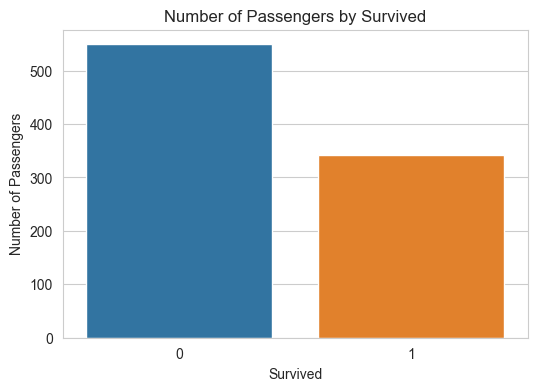

0    549
1    342
Name: Survived, dtype: int64

In [11]:
# Thống kê số lượng hành khách theo biến Survived
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=titanic, x='Survived')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers by Survived')
plt.show()
survival_count = titanic['Survived'].value_counts()
survival_count


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
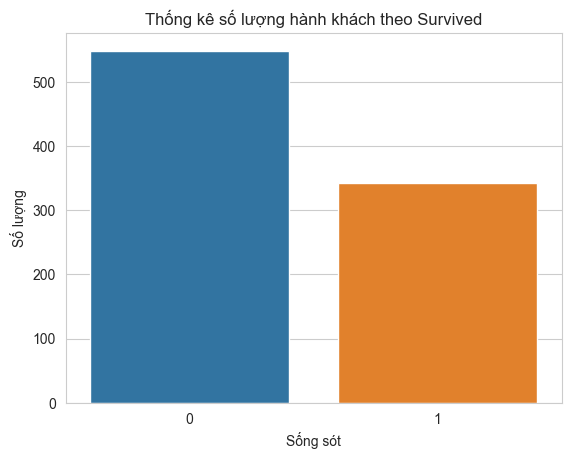

</details>

Bạn có nhận xét gì với biểu đồ trên?
#### Số liệu thống kê số lượng hành khách theo biến "Survived" cho thấy:

- Số lượng hành khách không sống sót (Survived=0) là 549 người.
- Số lượng hành khách sống sót (Survived=1) là 342 người.
- Điều này cho thấy rằng trong tập dữ liệu Titanic, số lượng hành khách không sống sót nhiều hơn so với số lượng hành khách sống sót. Sự phân phối này có thể giúp chúng ta hiểu thêm về tỷ lệ sống sót và không sống sót trong sự kiện đắm tàu Titanic.

### Bước 3 - Phân tích trực quan hóa dữ liệu
1. Phân tích biến Survived theo các biến định tính
- Thống kê số lượng hành khách theo Survived và Sex (giới tính)
- Thống kê số lượng hành khách theo Survived và Pclass (hạng vé)
- Thống kê số lượng hành khách theo Survived và Embarked (nơi lên tàu)
2. Phân tích biến Survived theo các biến định lượng
- Phân tích Survived theo tuổi hành khách
- Phân tích Survived theo SibSp (Số lượng anh chị em và vợ/chồng đi cùng trên tàu)
- Phân tích Survived theo Parch (Số lượng cha mẹ và con cái đi cùng trên tàu)
- Phân tích Survived theo Fare (Giá vé)

#### 3.1 Phân tích biến Survived theo các biến định tính

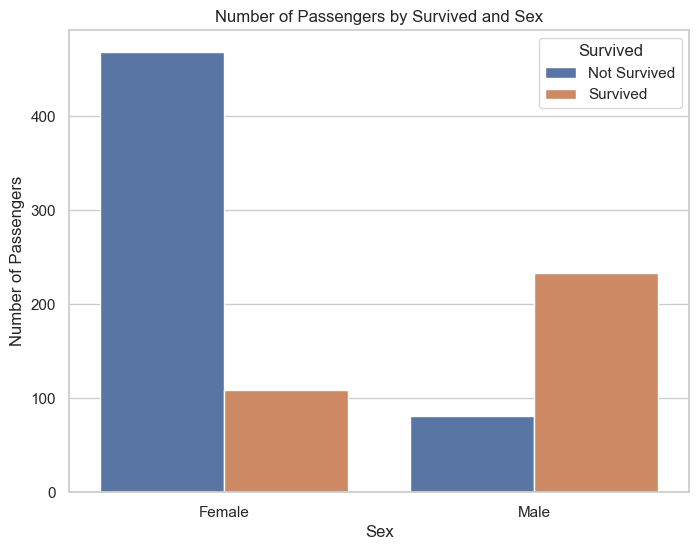

In [25]:
# Thống kê số lượng hành khách theo Survived và Sex (giới tính)
titanic['Survived'] = titanic['Survived'].astype(int)

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

sns.countplot(data=titanic, x='Sex', hue='Survived')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers by Survived and Sex')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.xticks([0, 1], ['Female', 'Male'])

plt.show()




In [26]:
survival_sex_count = titanic.groupby(['Survived', 'Sex']).size()
print(survival_sex_count)


Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
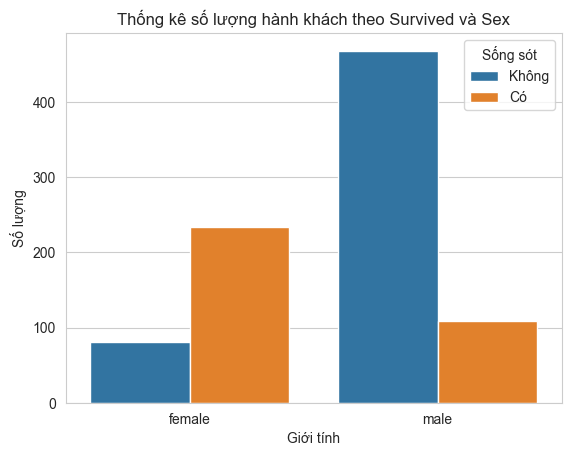

</details>

Bạn có nhận xét gì với biểu đồ trên ?

#### Dựa vào số liệu hành khách theo "Survived" và "Sex", ta có thể thấy:

- Số lượng hành khách không sống sót (Survived = 0) là 549 người, trong đó có 81 người là nữ (female) và 468 người là nam (male).

- Số lượng hành khách sống sót (Survived = 1) là 342 người, trong đó có 233 người là nữ (female) và 109 người là nam (male).

#### Nhận xét chung là có nhiều phụ nữ sống sót hơn so với nam giới trong tập dữ liệu này.

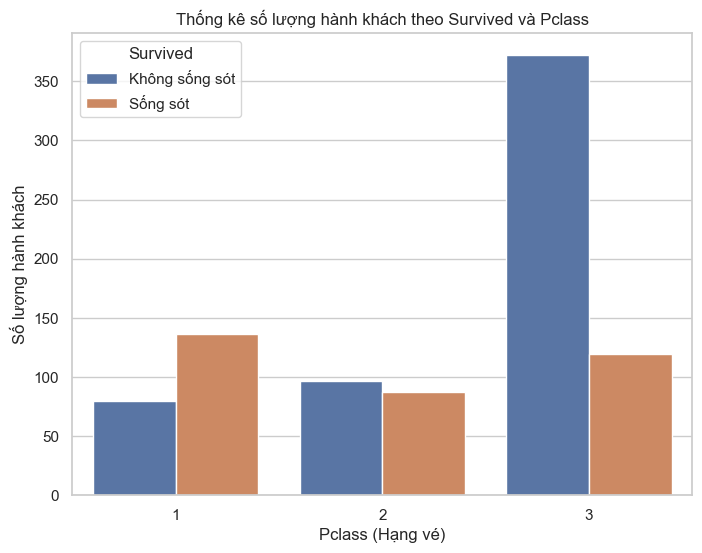

In [27]:
#Thống kê số lượng hành khách theo Survived và Pclass (hạng vé)
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic, x='Pclass', hue='Survived')
plt.xlabel('Pclass (Hạng vé)')
plt.ylabel('Số lượng hành khách')
plt.title('Thống kê số lượng hành khách theo Survived và Pclass')
plt.legend(title='Survived', labels=['Không sống sót', 'Sống sót'])
plt.show()

In [28]:
survival_pclass_count = titanic.groupby(['Survived', 'Pclass']).size()
print(survival_pclass_count)


Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
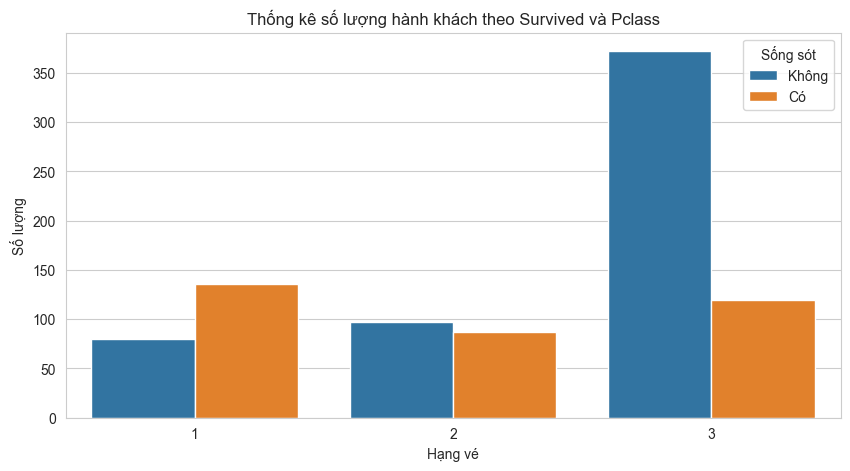
</details>

Bạn có nhận xét gì với biểu đồ trên ?
#### Số liệu trên thể hiện sự phân phối số lượng hành khách theo hai biến "Survived" (0 - Không sống sót, 1 - Sống sót) và "Pclass" (hạng vé). Dựa vào số liệu trên, chúng ta có thể đưa ra một số nhận xét và kết luận:

1. Hạng vé (Pclass) có sự phân phối rõ rệt:
   - Hạng vé 3 (Pclass = 3) có số lượng hành khách nhiều nhất cả trong nhóm sống sót và không sống sót, với 372 người không sống sót và 119 người sống sót.
   - Hạng vé 1 (Pclass = 1) có số lượng hành khách cao trong nhóm sống sót (136 người) và thấp trong nhóm không sống sót (80 người).
   - Hạng vé 2 (Pclass = 2) có số lượng hành khách tương đối thấp hơn so với hạng vé 1 và 3, với 87 người sống sót và 97 người không sống sót.

2. Hành khách ở hạng vé cao (Pclass = 1) có tỷ lệ sống sót cao hơn so với hành khách ở hạng vé thấp (Pclass = 3). Điều này có thể cho thấy hạng vé có mối liên quan với khả năng sống sót, với hành khách ở hạng vé cao có cơ hội sống sót tốt hơn.

3. Tổng số lượng hành khách sống sót (Suvived = 1) là 342 người, trong khi số lượng hành khách không sống sót (Survived = 0) là 549 người.



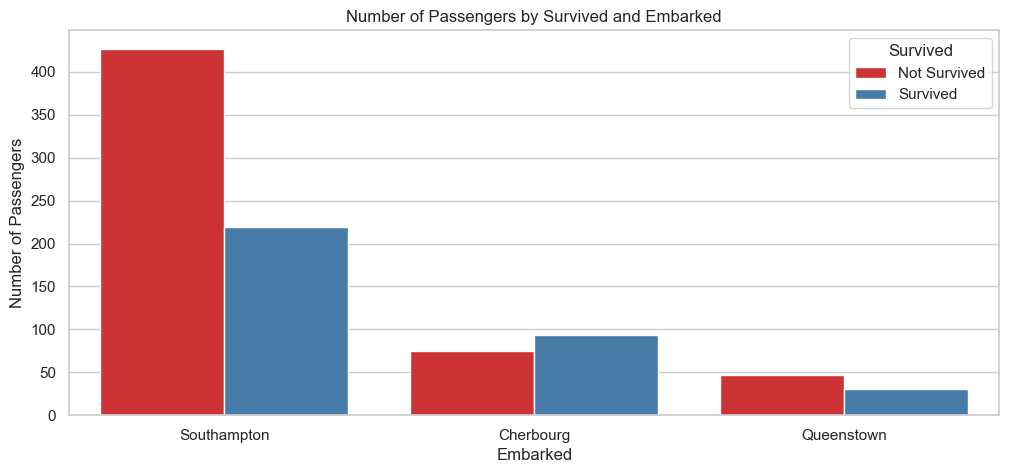

In [29]:
#Thống kê số lượng hành khách theo Survived và Embarked (nơi lên tàu)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))
sns.countplot(data=titanic, x='Embarked', hue='Survived', palette='Set1')
plt.xlabel('Embarked')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers by Survived and Embarked')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()


In [30]:
survived_embarked_count = pd.crosstab(index=titanic['Survived'], columns=titanic['Embarked'])

# In kết quả
print(survived_embarked_count)

Embarked  Cherbourg  Queenstown  Southampton
Survived                                    
0                75          47          427
1                93          30          219


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
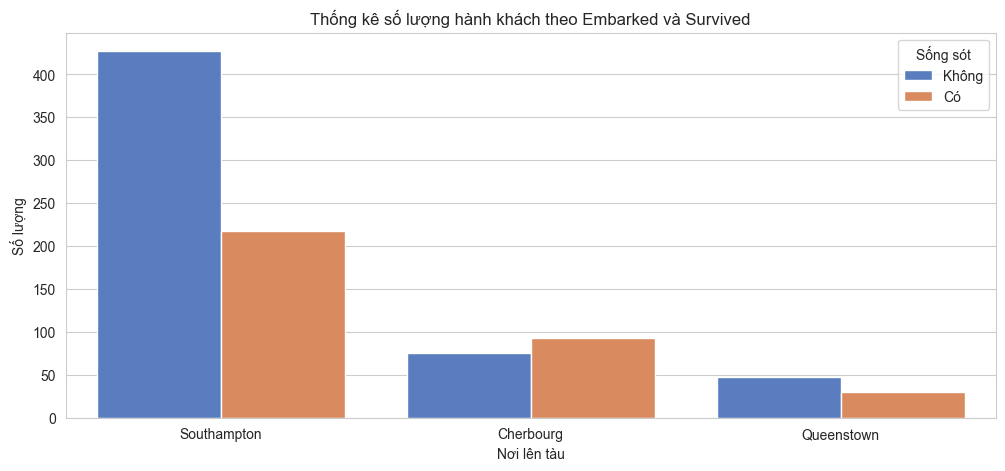
</details>

Bạn có nhận xét gì với biểu đồ trên ?
#### Dựa vào bảng thống kê số lượng hành khách theo Survived và Embarked, ta có thể nhận xét:

- Cảng Southampton (Southampton) có số lượng hành khách lớn nhất cả khi sống sót (219 hành khách) và khi không sống sót (427 hành khách).
- Cảng Cherbourg (Cherbourg) có số lượng hành khách khi sống sót (93 hành khách) lớn hơn so với khi không sống sót (75 hành khách).
- Cảng Queenstown (Queenstown) có số lượng hành khách khi sống sót (30 hành khách) ít hơn so với khi không sống sót (47 hành khách).
#### Tổng cộng, số lượng hành khách sống sót (Survived = 1) ít hơn so với số lượng không sống sót (Survived = 0) tại tất cả các cảng lên tàu.

#### 3.2 Phân tích biến Survived theo các biến định lượng

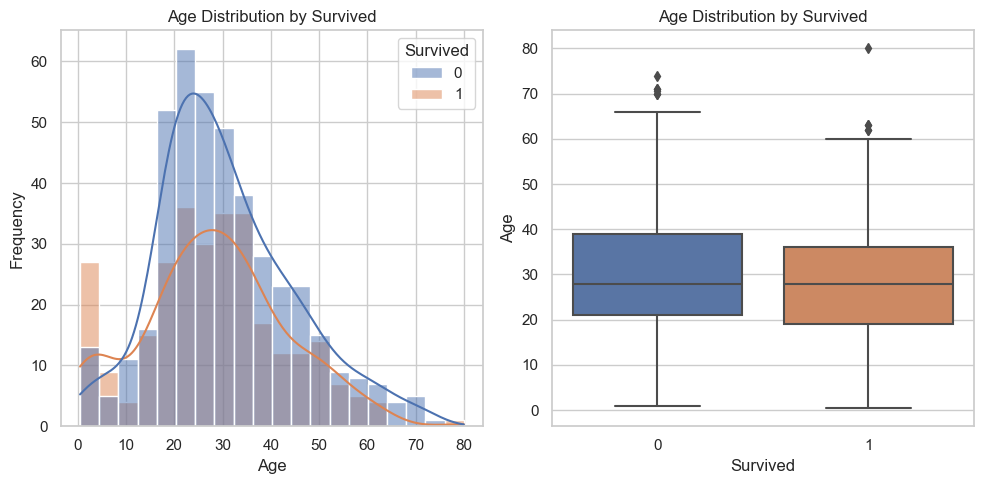

In [31]:
# Phân tích phân phối tuổi của hành khách theo Survived(vẽ histogram và boxplot trên cùng figure)
plt.figure(figsize=(10, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=titanic, x='Age', hue='Survived', bins=20, kde=True)
plt.title('Age Distribution by Survived')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=titanic, x='Survived', y='Age')
plt.title('Age Distribution by Survived')
plt.xlabel('Survived')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

In [32]:
age_survival_counts = titanic.groupby(['Survived'])['Age'].describe()
print(age_survival_counts)


          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
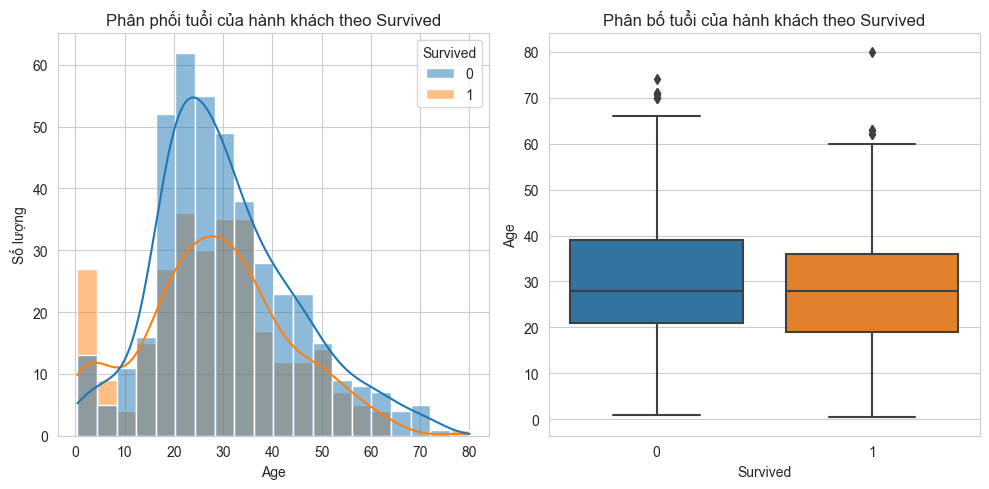
</details>

Bạn có nhận xét gì với biểu đồ trên ?
#### Đối với những người không sống sót (Survived=0), tuổi trung bình là khoảng 30.63 tuổi, với độ lệch chuẩn khoảng 14.17 tuổi.

#### Điều này cho thấy rằng đa số những người không sống sót có độ tuổi trung bình tương đối và độ lệch chuẩn khá.

#### Đối với những người sống sót (Survived=1), tuổi trung bình là khoảng 28.34 tuổi, với độ lệch chuẩn khoảng 14.95 tuổi. 
#### Tuổi trung bình của những người sống sót tương đối gần với tuổi của những người không sống sót, và độ lệch chuẩn cũng tương đối khá.

#### Tuổi trung bình giữa hai nhóm không có sự khác biệt lớn, nhưng có một số người sống sót có tuổi nhỏ hơn, đặc biệt là người có tuổi dưới 1 tuổi (min=0.42) và người có tuổi tối đa 80 tuổi (max=80) trong nhóm sống sót.

#### Đối với những người không sống sót (Survived=0), phân phối tuổi có độ lệch dương (right-skewed), tức là nó lệch về phía bên phải. Điều này có nghĩa rằng có một số hành khách có tuổi lớn hơn so với tuổi trung bình, tạo ra đuôi dài về phía bên phải của phân phối.

#### Đối với những người sống sót (Survived=1), phân phối tuổi cũng có độ lệch dương (right-skewed). Tuy nhiên, đối với nhóm này, phân phối bị lệch ít hơn so với nhóm không sống sót.

#### Như vậy, cả hai nhóm đều có độ lệch dương, tuy nhiên, độ lệch của nhóm không sống sót mạnh hơn một chút. Điều này có thể ngụ ý rằng trong nhóm không sống sót, có một số người lớn tuổi hơn và tạo ra đuôi dài về phía bên phải. Trong trường hợp của nhóm sống sót, độ lệch dương cũng tồn tại nhưng yếu hơn, có thể cho thấy rằng nhóm này có sự đa dạng hơn về độ tuổi, bao gồm cả trẻ em và người già.

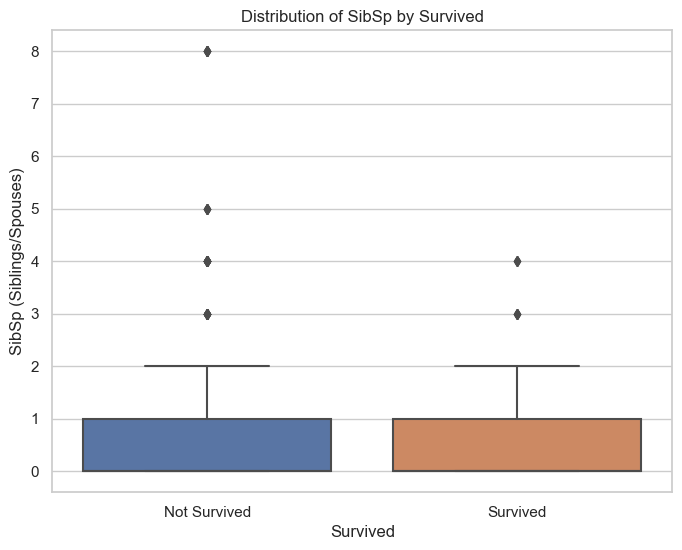

In [34]:
# Phân tích phân bố SibSp (Số lượng anh chị em và vợ/chồng đi cùng trên tàu) theo Survived
# Tạo biểu đồ boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=titanic, x='Survived', y='SibSp')
plt.xlabel('Survived')
plt.ylabel('SibSp (Siblings/Spouses)')
plt.title('Distribution of SibSp by Survived')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

In [35]:
sibsp_survival_counts = titanic.groupby(['Survived'])['SibSp'].describe()
print(sibsp_survival_counts)


          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.553734  1.288399  0.0  0.0  0.0  1.0  8.0
1         342.0  0.473684  0.708688  0.0  0.0  0.0  1.0  4.0


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
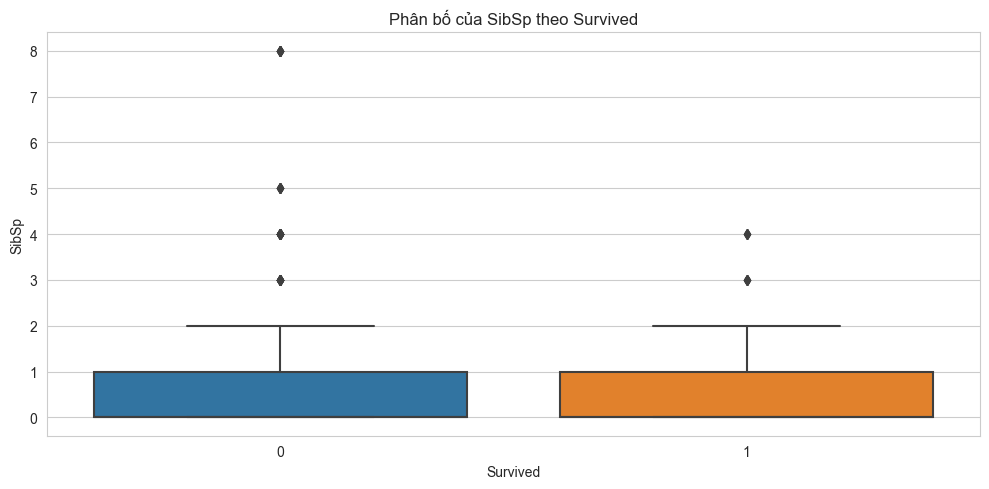
</details>

Bạn có nhận xét gì với biểu đồ trên ?
#### Nhận xét:

- Trung bình số lượng anh chị em và vợ/chồng đi cùng trên tàu (SibSp) của những người không sống sót (0.554) cao hơn so với những người sống sót (0.474) một chút.
- Độ lệch chuẩn của nhóm không sống sót lớn hơn so với nhóm sống sót, ngụ ý rằng sự biến động trong số lượng anh chị em và vợ/chồng đi cùng trên tàu của nhóm không sống sót lớn hơn.
- Phần lớn hành khách (50%) trong cả hai nhóm đều không có anh chị em hoặc vợ/chồng đi cùng trên tàu (SibSp = 0), nhưng có một số outliers (các giá trị ngoại lệ) trong cả hai nhóm, được thể hiện trên biểu đồ boxplot. Các outliers này có thể là các hành khách có số lượng anh chị em hoặc vợ/chồng đi cùng trên tàu lớn hơn so với phần lớn người khác.
- Biểu đồ boxplot cho biến SibSp theo Survived cho thấy một số outliers trong cả hai nhóm:

- Trong nhóm không sống sót (Survived = 0), có một số outliers có giá trị SibSp lớn hơn 3, có thể là những hành khách có số lượng anh chị em và vợ/chồng đi cùng trên tàu rất lớn.
- Trong nhóm sống sót (Survived = 1), cũng có một số outliers có giá trị SibSp lớn hơn 2, tượng tự như trong nhóm không sống sót.
- Các outliers này biểu thị cho những trường hợp đặc biệt trong dữ liệu, có thể là những gia đình lớn hoặc những người có số lượng anh chị em và vợ/chồng đi cùng trên tàu rất nhiều. Những trường hợp này có thể làm cho phân phối của biến SibSp trở nên lệch và có độ biến động lớn hơn so với phần lớn người khác.

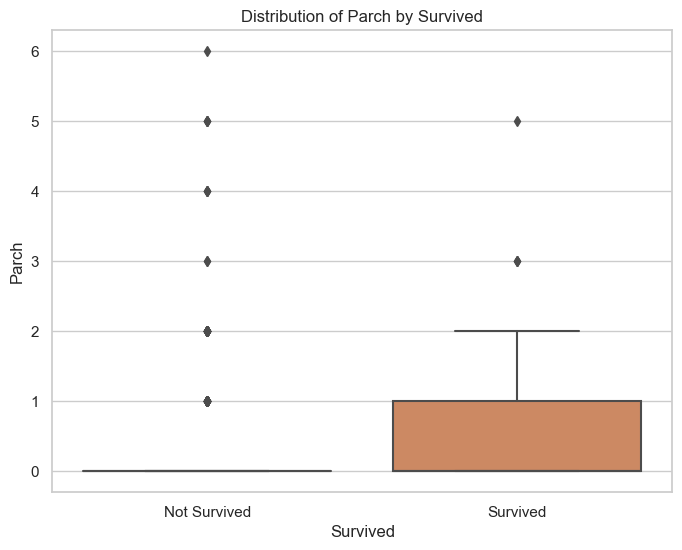

In [36]:
# Phân tích phân bố Parch (Số lượng cha mẹ và con cái đi cùng trên tàu) theo Survived
plt.figure(figsize=(8, 6))
sns.boxplot(data=titanic, x='Survived', y='Parch')
plt.xlabel('Survived')
plt.ylabel('Parch')
plt.title('Distribution of Parch by Survived')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

In [37]:
parch_survival_counts = titanic.groupby(['Survived'])['Parch'].describe()
print(parch_survival_counts)


          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.329690  0.823166  0.0  0.0  0.0  0.0  6.0
1         342.0  0.464912  0.771712  0.0  0.0  0.0  1.0  5.0


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
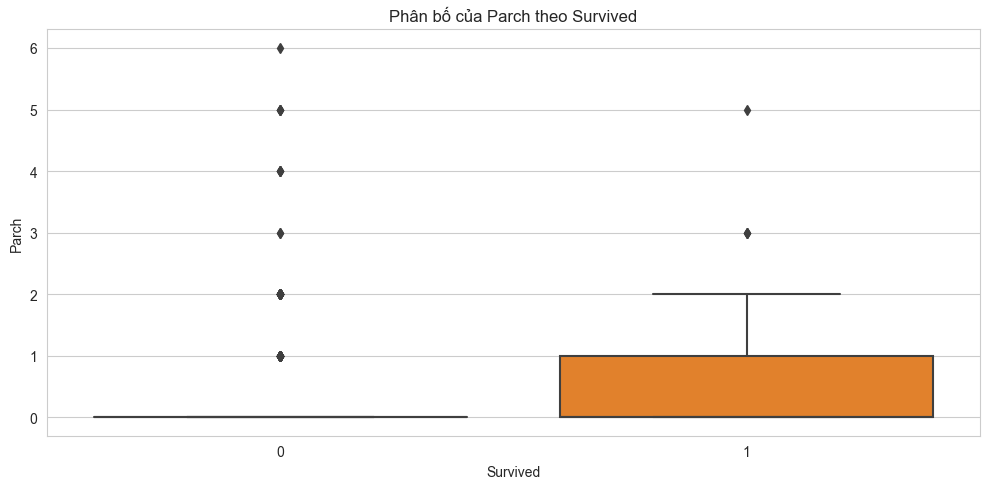
</details>

Bạn có nhận xét gì với biểu đồ trên ?
- Cả hai nhóm có phần lớn hành khách không có cha mẹ hoặc con cái đi cùng trên tàu (Parch = 0).
- Hành khách sống sót (Survived = 1) có xu hướng có số lượng ít nhất 1 người cha mẹ hoặc con cái đi cùng hơn so với nhóm không sống sót (Survived = 0).
- Phân phối của biến Parch có sự biến động và phân tán khá lớn, có một số outliers (các giá trị ngoại lệ) ở cả hai nhóm.

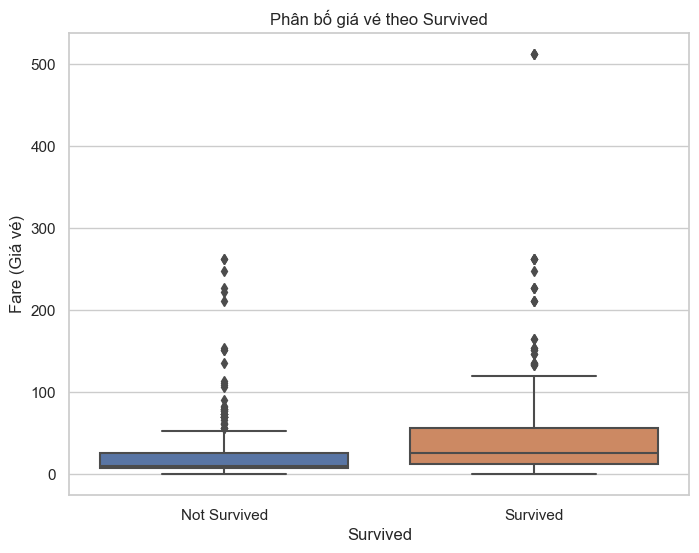

In [38]:
# Phân tích phân bố Fare (giá vé) theo Survived 
plt.figure(figsize=(8, 6))
sns.boxplot(data=titanic, x='Survived', y='Fare')
plt.xlabel('Survived')
plt.ylabel('Fare (Giá vé)')
plt.title('Phân bố giá vé theo Survived')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

In [39]:
fare_survival_counts = titanic.groupby(['Survived'])['Fare'].describe()
print(fare_survival_counts)


          count       mean        std  min      25%   50%   75%       max
Survived                                                                 
0         549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
1         342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
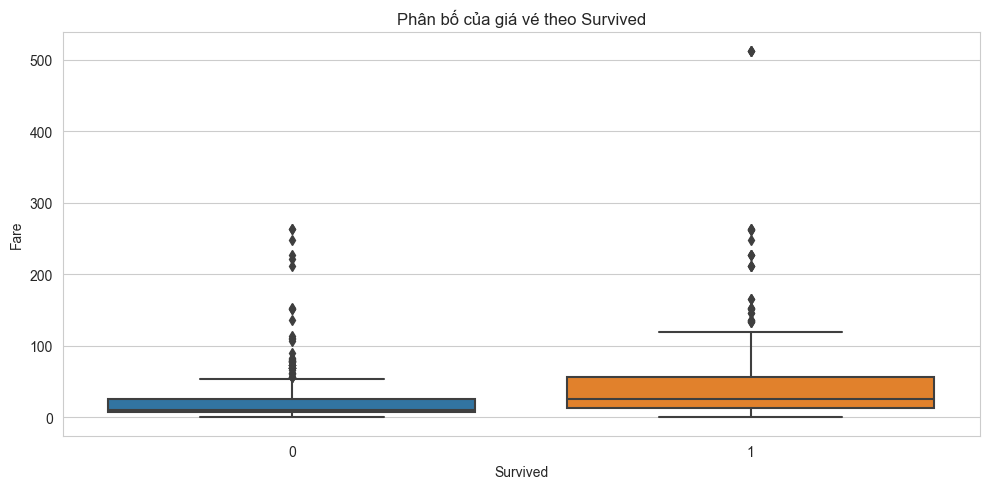
</details>

Bạn có nhận xét gì với biểu đồ trên ?
#### Dựa vào thống kê phân bố giá vé theo nhóm Survived (Sống sót hoặc không), ta có các nhận xét sau:

- Số lượng hành khách sống sót (Survived = 1) là 342 người, trong khi số lượng hành khách không sống sót (Survived = 0) là 549 người.

- Giá vé trung bình của những hành khách sống sót (mean) là khoảng 48.40 đơn vị, cao hơn đáng kể so với giá vé trung bình của những hành khách không sống sót (mean là khoảng 22.12 đơn vị).

- Phân bố giá vé có sự biến động lớn, với giá vé cao nhất (max) của hành khách sống sót là 512.33 đơn vị và của những hành khách không sống sót là 263 đơn vị. Điều này cho thấy có sự đa dạng về giá vé.

- 25% giá vé thấp nhất của những hành khách sống sót là 12.48 đơn vị, trong khi 25% giá vé thấp nhất của những hành khách không sống sót là 7.85 đơn vị. Điều này cho thấy rằng một phần lớn hành khách không sống sót đã mua vé với giá thấp hơn.

#### Như vậy, có sự khác biệt đáng kể về giá vé giữa nhóm hành khách sống sót và nhóm không sống sót, với hành khách sống sót thường mua vé với giá cao hơn.

### Bước 4 - Phân tích trực quan hóa dữ liệu với thuộc tính mới
1. Tạo thuộc tính mới từ các biến định lượng:   
- Biến Age  
    - Tạo cột nhóm tuổi (AgeGroup) từ cột 'Age' theo quy tắc : "Trẻ em" (0-12 tuổi), "Thiếu niên" (13-18 tuổi), "Người trưởng thành" (19-50 tuổi) và "Người cao tuổi" (51 tuổi trở lên).  
- Biến 'SibSp' và 'Parch'  
    - Tạo cột kích thước gia đình trên tàu (FamilySize) (bao gồm bản thân hành khách và người thân đi cùng trên tàu: anh chị em, vợ/chồng, cha mẹ, con cái)
- Biến 'Fare'
    - Tạo cột nhóm giá vé 'FareGroup' từ cột 'Fare'  theo các khoảng giá trị ['0-dưới 25', '25-dưới 50', '50-dưới 100', '100-dưới 200', '200 trở lên'].
2. Tạo thuộc tính mới từ biến định tính:
- Biến 'Cabin'
    - Tạo thuộc tính 'CabinType', ký tự đầu tiên trong thuộc tính số hiệu Cabin, là loại Cabin tương ứng với vị trí cabin trên tàu theo hình minh họa sau (nếu hành khách không có số hiệu cabin, tức là phòng ngủ riêng, giá trị của thuộc tính CabinType sẽ  là 'No')
    
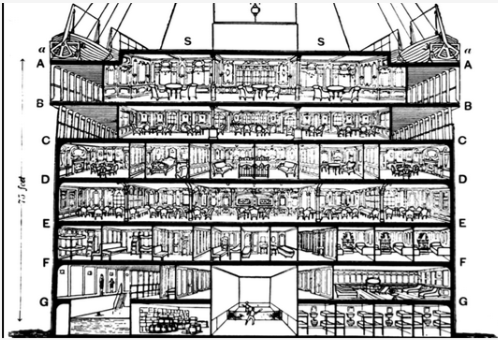    

3. Phân tích trực quan hóa dữ liệu với thuộc tính mới
- Thống kê số lượng hành khách theo Survived và AgeGroup (nhóm tuổi)
- Thống kê số lượng hành khách theo Survived và FamilySize (kích thước gia đình)
- Thống kê số lượng hành khách theo Survived và FareGroup (nhóm giá vé)
- Thống kê số lượng hành khách theo Survived và CabinType  

#### 4.1 Tạo thuộc tính mới từ các biến định lượng:

In [40]:
# Tạo nhóm tuổi 'AgeGroup' từ cột 'Age'
def age_group(age):
    if age <= 12:
        return "Trẻ em"
    elif age <= 18:
        return "Thiếu niên"
    elif age <= 50:
        return "Người trưởng thành"
    else:
        return "Người cao tuổi"

# Sử dụng hàm apply để tạo cột AgeGroup dựa trên cột Age
titanic['AgeGroup'] = titanic['Age'].apply(age_group)
print(titanic[['AgeGroup', 'Age']])



               AgeGroup   Age
0    Người trưởng thành  22.0
1    Người trưởng thành  38.0
2    Người trưởng thành  26.0
3    Người trưởng thành  35.0
4    Người trưởng thành  35.0
..                  ...   ...
886  Người trưởng thành  27.0
887  Người trưởng thành  19.0
888      Người cao tuổi   NaN
889  Người trưởng thành  26.0
890  Người trưởng thành  32.0

[891 rows x 2 columns]


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Age</th>
      <th>AgeGroup</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>22.0</td>
      <td>Người trưởng thành</td>
    </tr>
    <tr>
      <th>1</th>
      <td>38.0</td>
      <td>Người trưởng thành</td>
    </tr>
    <tr>
      <th>2</th>
      <td>26.0</td>
      <td>Người trưởng thành</td>
    </tr>
    <tr>
      <th>3</th>
      <td>35.0</td>
      <td>Người trưởng thành</td>
    </tr>
    <tr>
      <th>4</th>
      <td>35.0</td>
      <td>Người trưởng thành</td>
    </tr>
  </tbody>
</table>

</details>

In [43]:
# Tạo thuộc tính 'FamilySize' là kích thước gia đình trên tàu
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic[['SibSp', 'Parch', 'FamilySize']]


,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,1,2,4
889,0,0,1


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>SibSp</th>
      <th>Parch</th>
      <th>FamilySize</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>0</td>
      <td>2</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>0</td>
      <td>2</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0</td>
      <td>0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>0</td>
      <td>2</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0</td>
      <td>0</td>
      <td>1</td>
    </tr>
  </tbody>
</table>

</details>

In [44]:
# Tạo nhóm giá vé 'FareGroup' từ cột 'Fare'
# Xác định các khoảng giá trị
fare_bins = [0, 25, 50, 100, 200, float('inf')]
fare_labels = ['0-dưới 25', '25-dưới 50', '50-dưới 100', '100-dưới 200', '200 trở lên']

# Tạo cột 'FareGroup' từ cột 'Fare' sử dụng pd.cut
titanic['FareGroup'] = pd.cut(titanic['Fare'], bins=fare_bins, labels=fare_labels, right=False)
titanic[['Fare', 'FareGroup']]

,Fare,FareGroup
0,7.2500,0-dưới 25
1,71.2833,50-dưới 100
2,7.9250,0-dưới 25
3,53.1000,50-dưới 100
4,8.0500,0-dưới 25
...,...,...
886,13.0000,0-dưới 25
887,30.0000,25-dưới 50
888,23.4500,0-dưới 25
889,30.0000,25-dưới 50


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Fare</th>
      <th>FareGroup</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>7.2500</td>
      <td>0-dưới 25</td>
    </tr>
    <tr>
      <th>1</th>
      <td>71.2833</td>
      <td>50-dưới 100</td>
    </tr>
    <tr>
      <th>2</th>
      <td>7.9250</td>
      <td>0-dưới 25</td>
    </tr>
    <tr>
      <th>3</th>
      <td>53.1000</td>
      <td>50-dưới 100</td>
    </tr>
    <tr>
      <th>4</th>
      <td>8.0500</td>
      <td>0-dưới 25</td>
    </tr>
  </tbody>
</table>

</details>

#### 4.2 Tạo thuộc tính mới từ biến định tính:

In [45]:
# Tạo thuộc tính 'CabinType' là loại Cabin
# Tạo cột 'CabinType' từ cột 'Cabin'
titanic['CabinType'] = titanic['Cabin'].str[0].fillna('No')
titanic[['Cabin', 'CabinType']]

,Cabin,CabinType
0,NaN,No
1,C85,C
2,NaN,No
3,C123,C
4,NaN,No
...,...,...
886,NaN,No
887,B42,B
888,NaN,No
889,C148,C


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Cabin</th>
      <th>CabinType</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>NaN</td>
      <td>No</td>
    </tr>
    <tr>
      <th>1</th>
      <td>C85</td>
      <td>C</td>
    </tr>
    <tr>
      <th>2</th>
      <td>NaN</td>
      <td>No</td>
    </tr>
    <tr>
      <th>3</th>
      <td>C123</td>
      <td>C</td>
    </tr>
    <tr>
      <th>4</th>
      <td>NaN</td>
      <td>No</td>
    </tr>
  </tbody>
</table>
    
</details>

#### 4.3 Phân tích trực quan hóa dữ liệu với thuộc tính mới

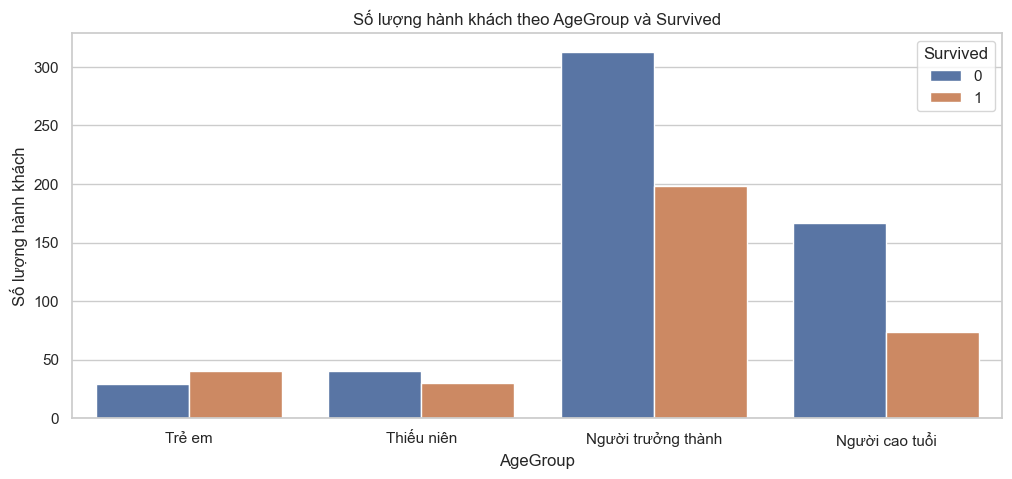

In [50]:
# Thống kê số lượng hành khách theo Survived và AgeGroup (nhóm tuổi)
from pandas.api.types import CategoricalDtype
# Đặt thứ tự cho AgeGroup
agegroup_order = ["Trẻ em", "Thiếu niên", "Người trưởng thành", "Người cao tuổi"]

# Chuyển AgeGroup sang dạng categorical với thứ tự đã định
titanic['AgeGroup'] = titanic['AgeGroup'].astype(CategoricalDtype(categories=agegroup_order, ordered=True))

# Đặt kích thước biểu đồ
plt.figure(figsize=(12, 5))

# Vẽ countplot
sns.countplot(data=titanic, x='AgeGroup', hue='Survived')

# Đặt tiêu đề và nhãn trục
plt.title('Số lượng hành khách theo AgeGroup và Survived')
plt.xlabel('AgeGroup')
plt.ylabel('Số lượng hành khách')

# Hiển thị biểu đồ
plt.show()


In [51]:
# Thống kê số lượng hành khách theo Survived và AgeGroup
agegroup_order = ["Trẻ em", "Thiếu niên", "Người trưởng thành", "Người cao tuổi"]

# Sắp xếp AgeGroup theo thứ tự mong muốn
titanic['AgeGroup'] = titanic['AgeGroup'].astype(CategoricalDtype(categories=agegroup_order, ordered=True))

# Sử dụng groupby để thống kê
survival_agegroup_counts = titanic.groupby(['Survived', 'AgeGroup']).size().unstack()

# Hiển thị số liệu
print(survival_agegroup_counts)


AgeGroup  Trẻ em  Thiếu niên  Người trưởng thành  Người cao tuổi
Survived                                                        
0             29          40                 313             167
1             40          30                 198              74


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
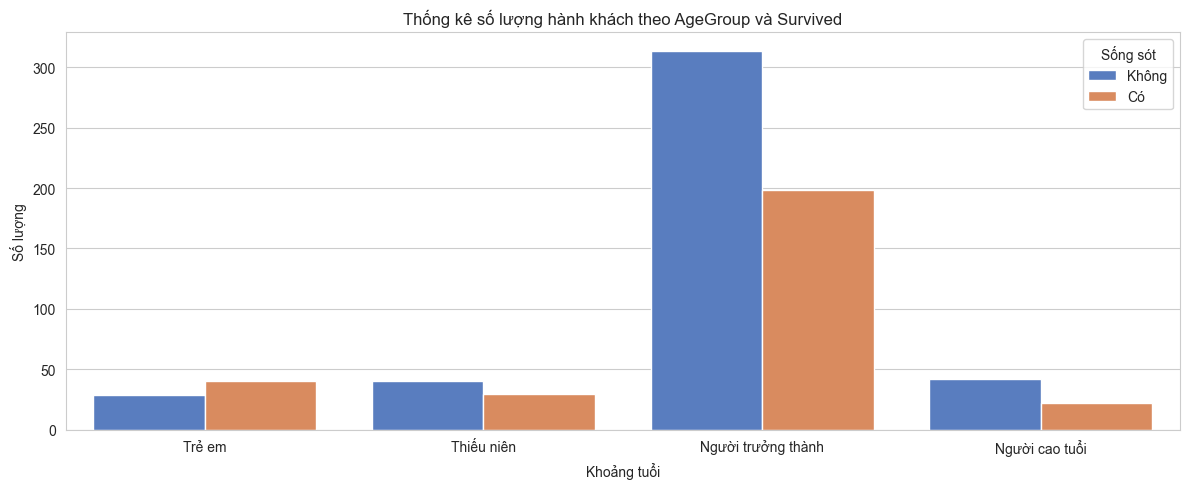
</details>

Bạn có nhận xét gì với biểu đồ trên ?
#### Dựa trên bảng số liệu Thống kê số lượng hành khách theo `Survived` và `AgeGroup` (nhóm tuổi), chúng ta có thể nhận xét các điểm sau:

- Trong nhóm tuổi "Trẻ em", số lượng hành khách sống sót (Survived=1) là 40, trong khi số lượng hành khách không sống sót (Survived=0) là 29.

- Trong nhóm tuổi "Thiếu niên", số lượng hành khách sống sót là 30, trong khi số lượng hành khách không sống sót là 40.

- Trong nhóm tuổi "Người trưởng thành", số lượng hành khách sống sót là 198, trong khi số lượng hành khách không sống sót là 313.

- Trong nhóm tuổi "Người cao tuổi", số lượng hành khách sống sót là 74, trong khi số lượng hành khách không sống sót là 167.

#### Từ các số liệu trên, có thể thấy rằng tỷ lệ sống sót thay đổi tùy theo nhóm tuổi, với số lượng hành khách trưởng thành có tỷ lệ sống sót cao hơn so với các nhóm tuổi khác. Trong khi đó, số lượng hành khách thiếu niên và trẻ em có tỷ lệ sống sót tương đối thấp hơn.

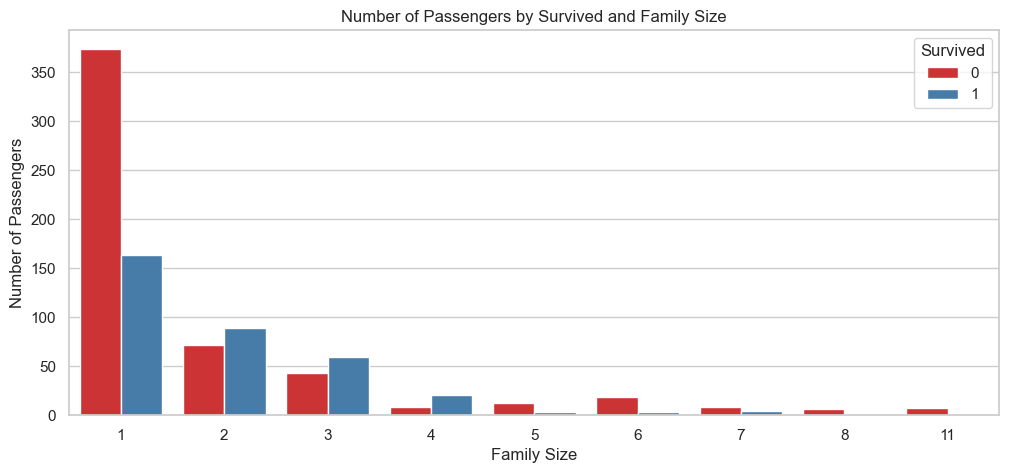

In [52]:
# Thống kê số lượng hành khách theo Survived và FamilySize (kích thước gia đình)
# Đặt kích thước biểu đồ
plt.figure(figsize=(12, 5))

# Vẽ biểu đồ countplot
sns.countplot(data=titanic, x='FamilySize', hue='Survived', palette='Set1')

# Đặt các nhãn và tiêu đề
plt.xlabel('Family Size')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers by Survived and Family Size')

# Hiển thị biểu đồ
plt.show()


In [53]:
# Thống kê số lượng hành khách theo Survived và FamilySize
family_size_counts = titanic.groupby(['Survived', 'FamilySize']).size().unstack()

# Đặt tên cột cho DataFrame
family_size_counts.columns = ['FamilySize_' + str(col) for col in family_size_counts.columns]

# Hiển thị số liệu
print(family_size_counts)


          FamilySize_1  FamilySize_2  FamilySize_3  FamilySize_4  \
Survived                                                           
0                374.0          72.0          43.0           8.0   
1                163.0          89.0          59.0          21.0   

          FamilySize_5  FamilySize_6  FamilySize_7  FamilySize_8  \
Survived                                                           
0                 12.0          19.0           8.0           6.0   
1                  3.0           3.0           4.0           NaN   

          FamilySize_11  
Survived                 
0                   7.0  
1                   NaN  


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
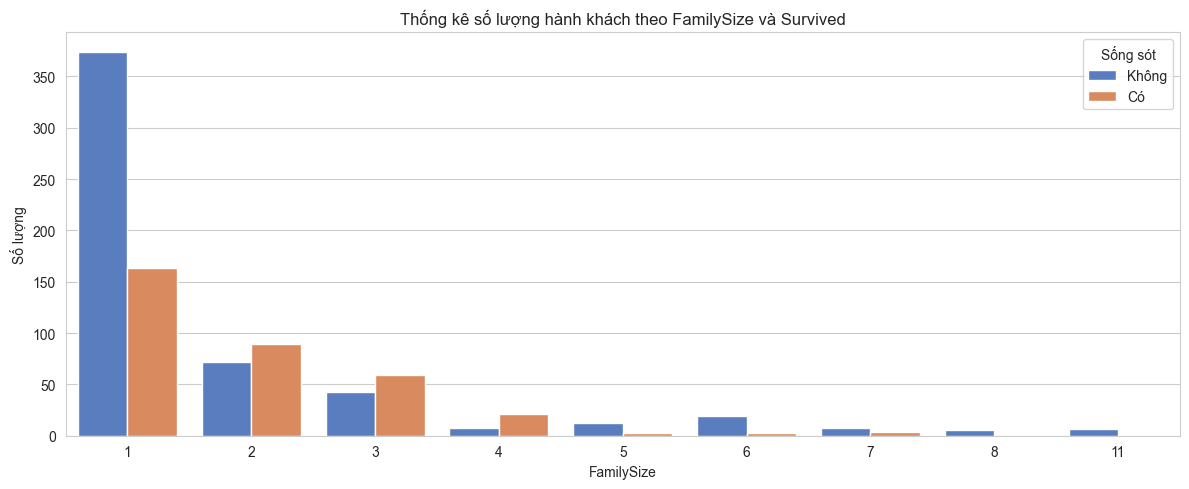
</details>

Bạn có nhận xét gì với biểu đồ trên ?
#### Dựa vào số liệu thống kê số lượng hành khách theo `Survived` và `FamilySize` (kích thước gia đình), ta có thể nhận xét một số điểm quan trọng:

- Hành khách đi một mình (FamilySize_1) có số lượng nhiều nhất trong cả hai nhóm sống và chết.
- Hành khách có gia đình kích thước 2 (FamilySize_2) và 3 (FamilySize_3) cũng khá phổ biến trong cả hai nhóm.
- Số lượng hành khách có gia đình kích thước lớn hơn (từ FamilySize_4 trở lên) ít hơn và thường ít hơn trong nhóm sống (Survived=1).
- Có một số gia đình có kích thước lớn hơn (FamilySize_7, FamilySize_8, FamilySize_11), nhưng số lượng của chúng khá ít, và tất cả các gia đình này đều có kết quả không sống sót.

#### Như vậy, có thể thấy rằng hành khách đi một mình hoặc có gia đình kích thước nhỏ có tỷ lệ sống sót cao hơn so với những gia đình lớn hơn.

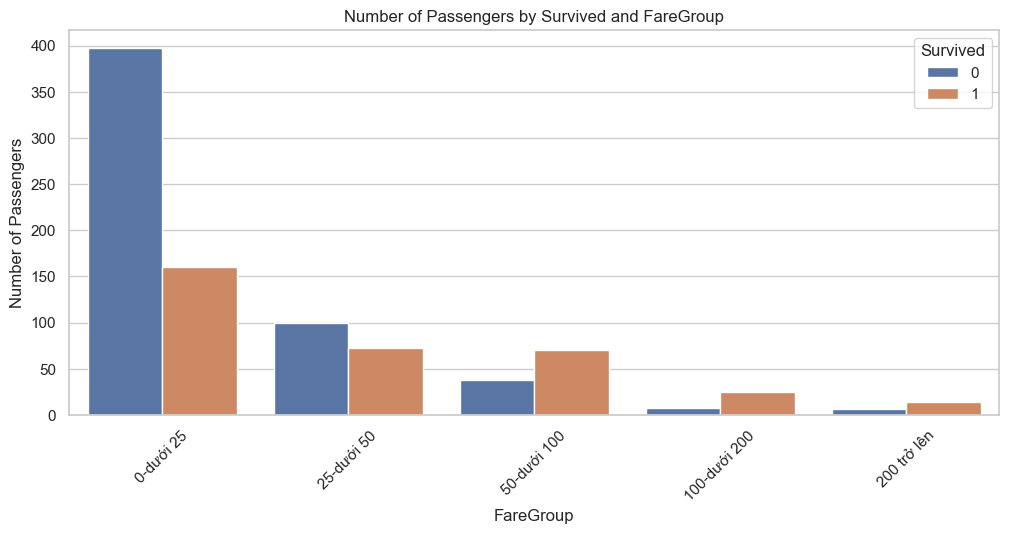

In [54]:
# Thống kê số lượng hành khách theo Survived và FareGroup (nhóm giá vé)
plt.figure(figsize=(12, 5))
sns.countplot(data=titanic, x='FareGroup', hue='Survived')
plt.xlabel('FareGroup')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers by Survived and FareGroup')
plt.xticks(rotation=45)  # Để x-axis labels hiển thị dễ đọc hơn
plt.show()



In [55]:
# Tạo bảng pivot thể hiện số lượng hành khách theo Survived và FareGroup
fare_survival_counts = titanic.pivot_table(index='Survived', columns='FareGroup', values='PassengerId', aggfunc='count', fill_value=0)

# Hiển thị bảng thống kê
print(fare_survival_counts)


FareGroup  0-dưới 25  25-dưới 50  50-dưới 100  100-dưới 200  200 trở lên
Survived                                                                
0                397         100           38             8            6
1                160          73           70            25           14


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
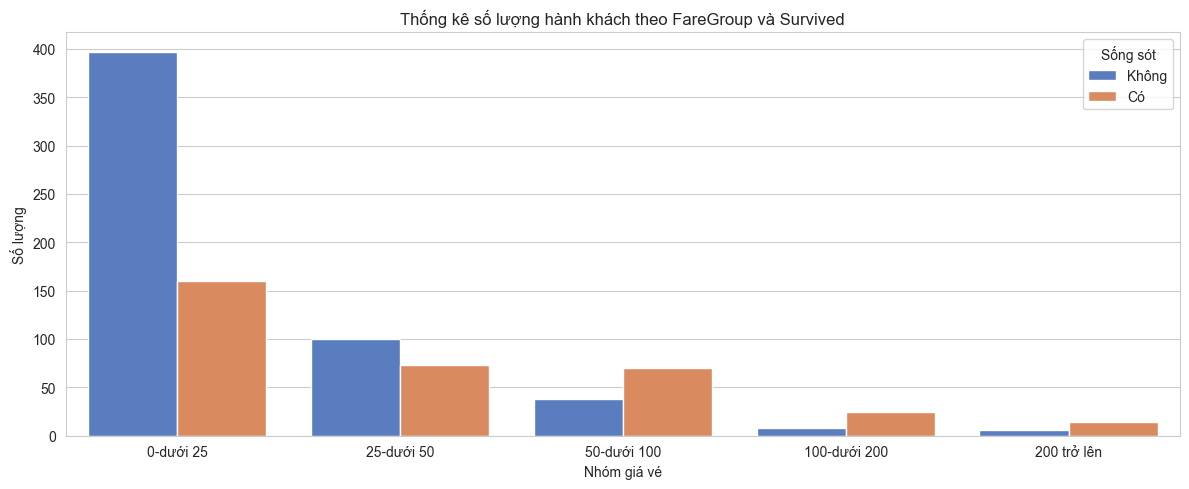
</details>

Bạn có nhận xét gì với biểu đồ trên ?
#### Sau khi thực hiện thống kê số lượng hành khách theo `Survived` và `FareGroup` (nhóm giá vé), ta có kết quả như sau:

- Trong nhóm hành khách không sống sót (`Survived=0`):
  - Có 397 hành khách với giá vé từ 0 đến dưới 25.
  - Có 100 hành khách với giá vé từ 25 đến dưới 50.
  - Có 38 hành khách với giá vé từ 50 đến dưới 100.
  - Có 8 hành khách với giá vé từ 100 đến dưới 200.
  - Có 6 hành khách với giá vé từ 200 trở lên.

- Trong nhóm hành khách sống sót (`Survived=1`):
  - Có 160 hành khách với giá vé từ 0 đến dưới 25.
  - Có 73 hành khách với giá vé từ 25 đến dưới 50.
  - Có 70 hành khách với giá vé từ 50 đến dưới 100.
  - Có 25 hành khách với giá vé từ 100 đến dưới 200.
  - Có 14 hành khách với giá vé từ 200 trở lên.

#### Nhận xét:
- Số lượng hành khách sống sót trong các nhóm giá vé từ 25 đến dưới 100 cao hơn so với số lượng hành khách không sống sót trong các nhóm giá vé tương tự. Điều này có thể cho thấy mối quan hệ giữa giá vé và khả năng sống sót.
- Nhóm giá vé từ 100 đến dưới 200 và giá vé từ 200 trở lên có tỷ lệ sống sót cao hơn so với các nhóm giá vé thấp hơn.
- Hành khách có vé giá dưới 25 có số lượng lớn nhất trong cả hai nhóm sống sót và không sống sót.

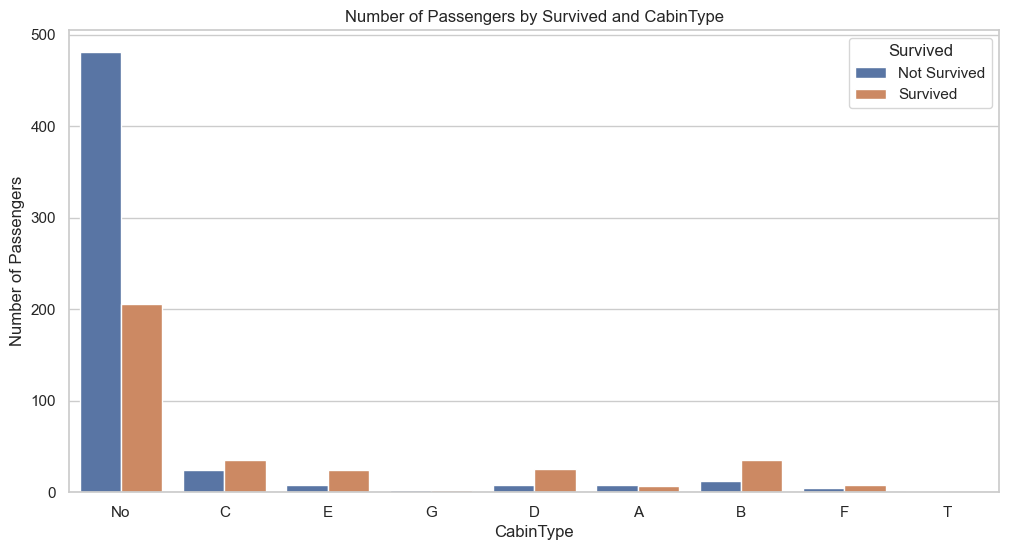

In [58]:
# Thống kê số lượng hành khách theo Survived và CabinType (loại Cabin)
import seaborn as sns
import matplotlib.pyplot as plt

# Tiến hành thống kê số lượng hành khách theo Survived và CabinType
cabin_survival_counts = titanic.groupby(['Survived', 'CabinType']).size().unstack()

# Vẽ biểu đồ countplot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.countplot(data=titanic, x='CabinType', hue='Survived')
plt.xlabel('CabinType')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers by Survived and CabinType')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.xticks(rotation=0)  # Để hiển thị các loại CabinType dọc
plt.show()


In [59]:
# Sử dụng hàm crosstab để thống kê số liệu
cabin_survival_counts = pd.crosstab(index=titanic['Survived'], columns=titanic['CabinType'], margins=True, margins_name='Total')

# In số liệu thống kê
print(cabin_survival_counts)


CabinType   A   B   C   D   E   F  G   No  T  Total
Survived                                           
0           8  12  24   8   8   5  2  481  1    549
1           7  35  35  25  24   8  2  206  0    342
Total      15  47  59  33  32  13  4  687  1    891


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
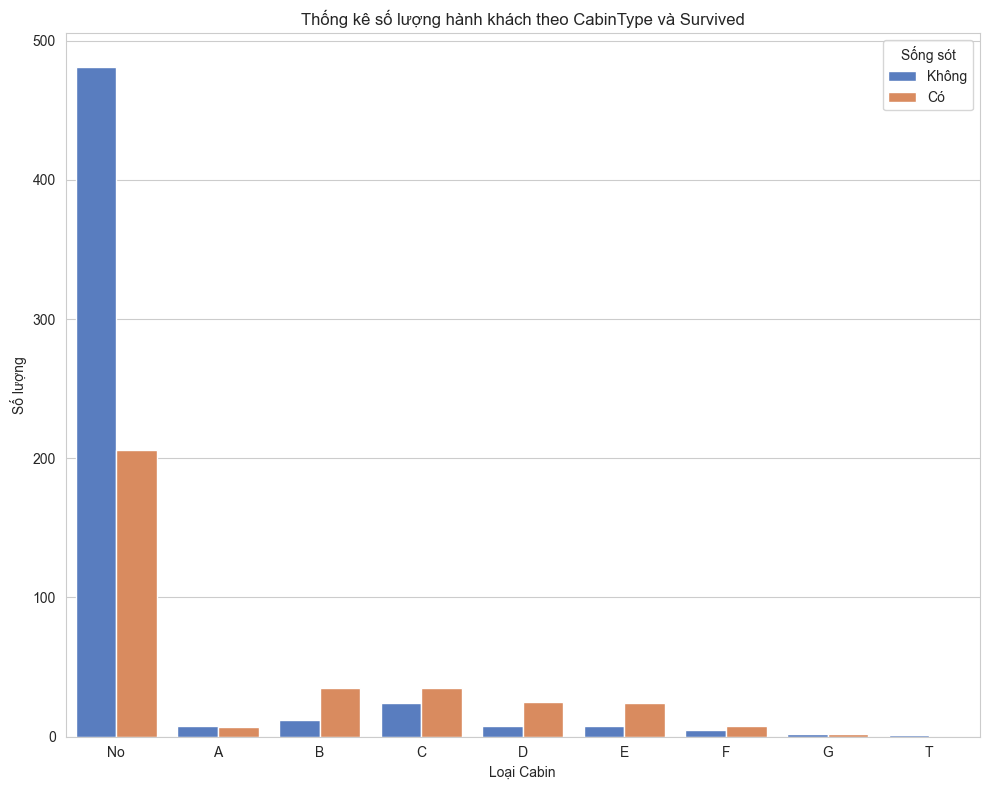
</details>

Bạn có nhận xét gì với biểu đồ trên ?
#### Sau khi thống kê số liệu hành khách theo `Survived` và `CabinType` (loại Cabin), ta có các nhận xét sau:

- Loại Cabin "B" có số lượng hành khách sống sót nhiều nhất (35 hành khách).
- Loại Cabin "F" có số lượng hành khách sống sót ít nhất (8 hành khách).
- Loại Cabin "T" chỉ có 1 hành khách và hành khách này không sống sót.
- Loại Cabin "No" (không có thông tin về Cabin) có số lượng hành khách không sống sót nhiều nhất (481 hành khách).

#### Tổng số hành khách là 891, trong đó 342 sống sót và 549 không sống sót.

### Bước 5 - Phân tích biến Survived với kết hợp giữa 2 biến định tính
1. Phân tích biến Survived theo Pclass (hạng vé) và Sex (giới tính)
2. Phân tích biến Survived theo AgeGroup (nhóm tuổi) và Sex (giới tính)

#### 5.1 Phân tích biến Survived theo Pclass và Sex

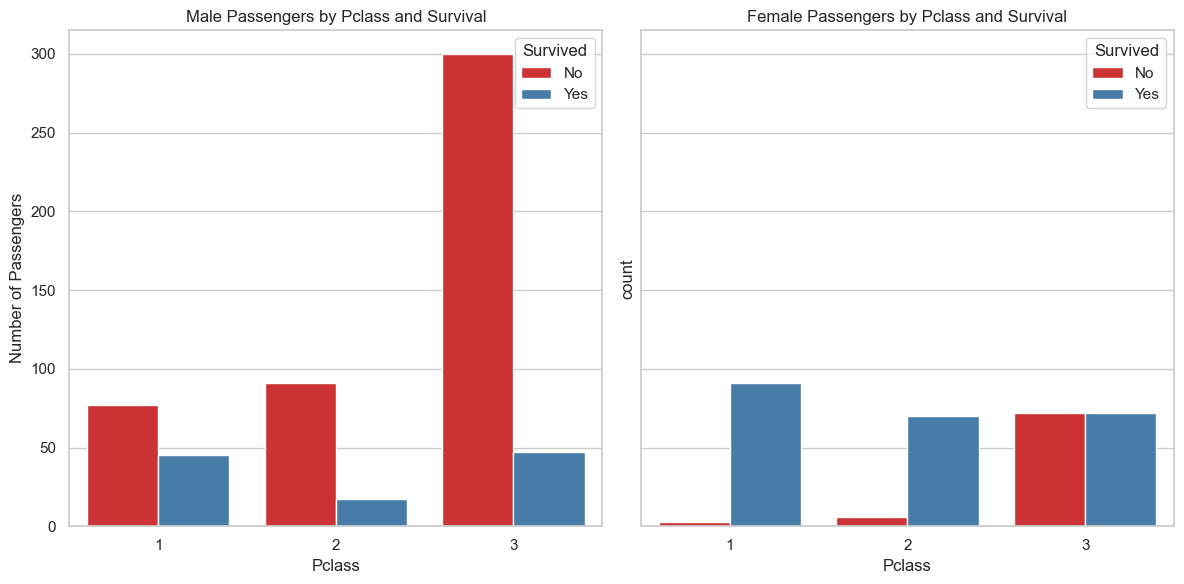

In [65]:
# Thống kê số lượng hành khách theo Pclass, Sex và Survived
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo khung hình chung cho 2 biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Biểu đồ 1: Số lượng nam theo Pclass với trục y là sống sót (Survived)
sns.countplot(data=titanic[titanic['Sex'] == 'male'], x='Pclass', hue='Survived', ax=axes[0], palette='Set1')
axes[0].set_xlabel('Pclass')
axes[0].set_ylabel('Number of Passengers')
axes[0].set_title('Male Passengers by Pclass and Survival')
axes[0].legend(title='Survived', labels=['No', 'Yes'], loc='upper right')

# Biểu đồ 2: Số lượng nữ theo Pclass với trục y là sống sót (Survived)
sns.countplot(data=titanic[titanic['Sex'] == 'female'], x='Pclass', hue='Survived', ax=axes[1], palette='Set1')
axes[1].set_xlabel('Pclass')
axes[1].set_title('Female Passengers by Pclass and Survival')
axes[1].legend(title='Survived', labels=['No', 'Yes'], loc='upper right')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()



In [66]:
# Số lượng nam theo Pclass với trục y là sống sót (Survived)
male_survival_count = titanic[titanic['Sex'] == 'male'].groupby(['Pclass', 'Survived']).size().unstack()
print("Male Passengers by Pclass and Survival:")
print(male_survival_count)

# Số lượng nữ theo Pclass với trục y là sống sót (Survived)
female_survival_count = titanic[titanic['Sex'] == 'female'].groupby(['Pclass', 'Survived']).size().unstack()
print("\nFemale Passengers by Pclass and Survival:")
print(female_survival_count)


Male Passengers by Pclass and Survival:
Survived    0   1
Pclass           
1          77  45
2          91  17
3         300  47

Female Passengers by Pclass and Survival:
Survived   0   1
Pclass          
1          3  91
2          6  70
3         72  72


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
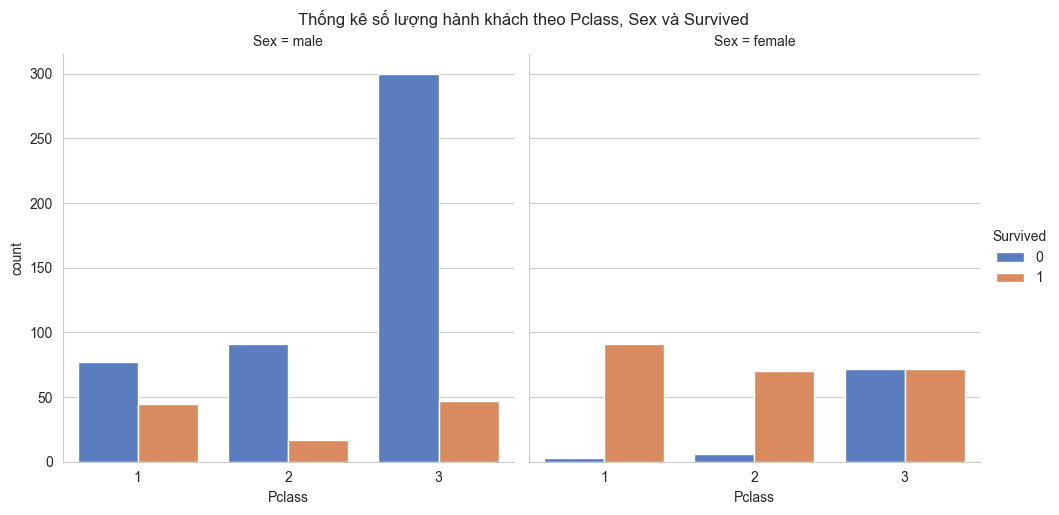
</details>

Bạn có nhận xét gì với biểu đồ trên ?
#### Số liệu thống kê cho số lượng hành khách theo Pclass (hạng vé), giới tính (male/female) và sống sót (Survived) là như sau:

**Nam theo Pclass và Survival:**
- Trong hạng vé Pclass 1, có 77 nam hành khách không sống sót (0) và 45 nam sống sót (1).
- Trong hạng vé Pclass 2, có 91 nam hành khách không sống sót và 17 nam sống sót.
- Trong hạng vé Pclass 3, có 300 nam hành khách không sống sót và 47 nam sống sót.

**Nữ theo Pclass và Survival:**
- Trong hạng vé Pclass 1, có 3 nữ hành khách không sống sót và 91 nữ sống sót.
- Trong hạng vé Pclass 2, có 6 nữ hành khách không sống sót và 70 nữ sống sót.
- Trong hạng vé Pclass 3, có 72 nữ hành khách không sống sót và 72 nữ sống sót.

### Nhận xét:
- Dựa vào số liệu trên, có sự khác biệt rõ rệt về tỷ lệ sống sót giữa các hạng vé (Pclass).
- Hầu hết nam và nữ trong hạng vé Pclass 1 có xu hướng sống sót nhiều hơn so với Pclass 2 và Pclass 3.
- Sự sống sót của nam hành khách trong Pclass 2 thấp hơn so với Pclass 1 và 3.
- Sự sống sót của nữ hành khách trong Pclass 2 và Pclass 3 có xu hướng tương đối tương đồng.


#### 5.2 Phân tích biến Survived theo AgeGroup (nhóm tuổi) và Sex (giới tính)

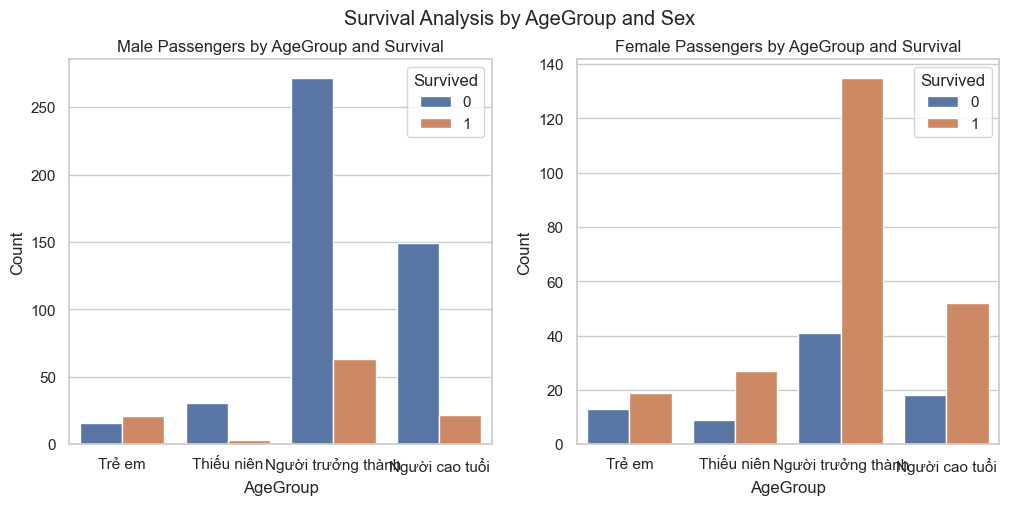

In [67]:
# Thống kê số lượng hành khách theo AgeGroup, Sex và Survived 
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo subplot với 1 dòng và 2 cột
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Biểu đồ countplot cho nam
sns.countplot(data=titanic[titanic['Sex'] == 'male'], x='AgeGroup', hue='Survived', ax=axes[0])
axes[0].set_title('Male Passengers by AgeGroup and Survival')
axes[0].set_xlabel('AgeGroup')
axes[0].set_ylabel('Count')

# Biểu đồ countplot cho nữ
sns.countplot(data=titanic[titanic['Sex'] == 'female'], x='AgeGroup', hue='Survived', ax=axes[1])
axes[1].set_title('Female Passengers by AgeGroup and Survival')
axes[1].set_xlabel('AgeGroup')
axes[1].set_ylabel('Count')

# Đặt tiêu đề cho toàn bộ khung hình
plt.suptitle('Survival Analysis by AgeGroup and Sex')

# Hiển thị biểu đồ
plt.show()


In [68]:
# Số lượng nam theo AgeGroup và Survived
male_survival_count = titanic[(titanic['Sex'] == 'male')].groupby(['AgeGroup', 'Survived']).size().unstack()

# Số lượng nữ theo AgeGroup và Survived
female_survival_count = titanic[(titanic['Sex'] == 'female')].groupby(['AgeGroup', 'Survived']).size().unstack()

print("Male Passengers by AgeGroup and Survival:")
print(male_survival_count)

print("\nFemale Passengers by AgeGroup and Survival:")
print(female_survival_count)


Male Passengers by AgeGroup and Survival:
Survived              0   1
AgeGroup                   
Trẻ em               16  21
Thiếu niên           31   3
Người trưởng thành  272  63
Người cao tuổi      149  22

Female Passengers by AgeGroup and Survival:
Survived             0    1
AgeGroup                   
Trẻ em              13   19
Thiếu niên           9   27
Người trưởng thành  41  135
Người cao tuổi      18   52


<details>
  <summary style='color:#FD6504; font-size:14px'>Nhấn vào đây để xem kết quả!</summary>
 
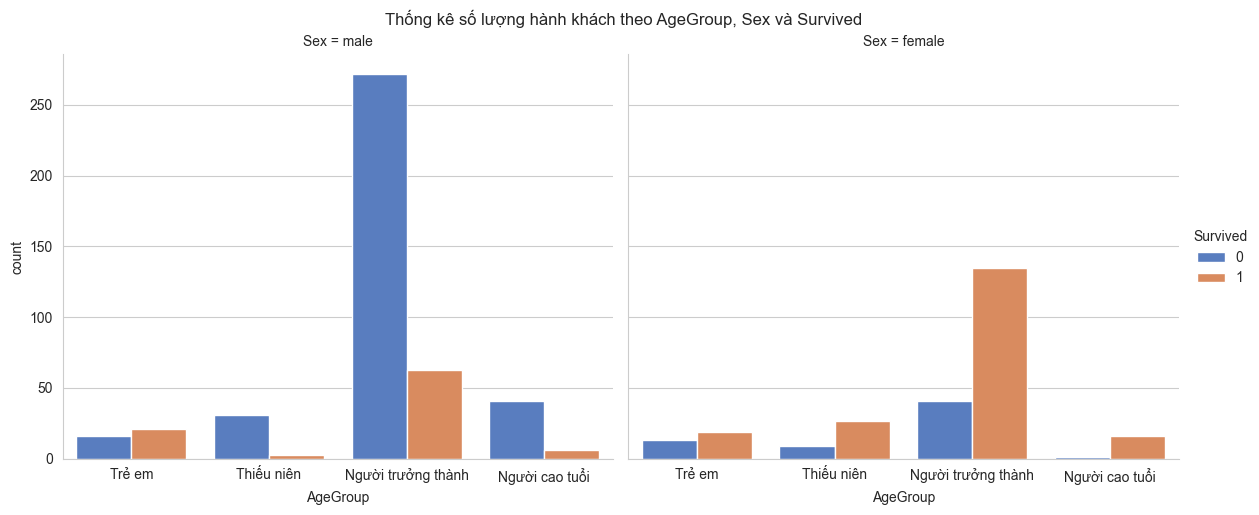
</details>

Bạn có nhận xét gì với biểu đồ trên ?
#### Dựa vào số liệu thống kê cho biến "Survived" theo "AgeGroup" và "Sex," chúng ta có thể nhận xét một số điểm chính:

1. Trong số nam hành khách:
   - Có 21 trẻ em nam (AgeGroup "Trẻ em") sống sót và 16 trẻ em nam không sống sót.
   - Thiếu niên nam (AgeGroup "Thiếu niên") có 3 người sống sót và 31 người không sống sót.
   - Người trưởng thành nam (AgeGroup "Người trưởng thành") có 63 người sống sót và 272 người không sống sót.
   - Người cao tuổi nam (AgeGroup "Người cao tuổi") có 22 người sống sót và 149 người không sống sót.

2. Trong số nữ hành khách:
   - Có 19 trẻ em nữ (AgeGroup "Trẻ em") sống sót và 13 trẻ em nữ không sống sót.
   - Thiếu niên nữ (AgeGroup "Thiếu niên") có 27 người sống sót và 9 người không sống sót.
   - Người trưởng thành nữ (AgeGroup "Người trưởng thành") có 135 người sống sót và 41 người không sống sót.
   - Người cao tuổi nữ (AgeGroup "Người cao tuổi") có 52 người sống sót và 18 người không sống sót.

#### Có thể thấy rằng tỷ lệ sống sót có sự biến đổi theo AgeGroup và Sex. Trẻ em và thiếu niên có tỷ lệ sống sót cao hơn so với người trưởng thành và người cao tuổi. Nữ hành khách có xu hướng có tỷ lệ sống sót cao hơn so với nam hành khách trong hầu hết các nhóm tuổi.

Dựa trên việc khám phá dữ liệu về thảm họa Titanic, bạn hãy rút ra những kết luận về các yếu tố ảnh hưởng đến khả năng sống sót của hành khách!


1. **Pclass (Hạng vé):** Hành khách ở hạng vé cao (Pclass 1) có tỷ lệ sống sót cao hơn so với hạng vé thấp (Pclass 3). Hạng vé thể hiện sự giàu có và địa vị xã hội, và có thể được xem xét là một yếu tố quan trọng ảnh hưởng đến khả năng sống sót.

2. **Giới tính (Sex):** Nữ hành khách có tỷ lệ sống sót cao hơn so với nam hành khách. Quy tắc ưu tiên cho phụ nữ và trẻ em trong việc lên tàu cứu hộ có thể giải thích sự chênh lệch này.

3. **Age (Tuổi tác):** Trẻ em và thiếu niên có tỷ lệ sống sót cao hơn so với người trưởng thành và người cao tuổi. Việc ưu tiên các nhóm tuổi này trong việc cứu hộ có thể làm giảm tỷ lệ tử vong.

4. **SibSp và Parch (Số lượng anh chị em/vợ chồng và cha mẹ/con cái):** Có thể thấy rằng có một mối quan hệ phức tạp giữa số lượng người thân đi cùng và khả năng sống sót. Có vẻ rằng hành khách đi cùng với một hoặc hai người thân có tỷ lệ sống sót cao hơn so với những người đi cùng với nhiều người thân.

5. **Fare (Giá vé):** Hành khách mua vé đắt tiền (FareGroup "200 trở lên") có tỷ lệ sống sót cao hơn so với những người mua vé giá rẻ (FareGroup "0-dưới 25"). Việc này có thể liên quan đến vị trí của hạng vé cao hơn trên tàu và ưu đãi trong quá trình cứu hộ.

#### Tóm lại, Pclass, giới tính, tuổi tác, số lượng người thân đi cùng, và giá vé là những yếu tố quan trọng ảnh hưởng đến khả năng sống sót của hành khách trên tàu Titanic. Các yếu tố này thể hiện sự ưu tiên trong quá trình cứu hộ và cách mà xã hội tổ chức để giải quyết tình huống khẩn cấp.